In [1]:
import tensorflow as tf

2024-01-06 20:03:01.363238: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 20:03:04.062200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 20:03:04.062571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 20:03:04.481775: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 20:03:05.625365: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 20:03:05.626566: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[0].shape

(28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
import numpy as np
import math

In [8]:
from matplotlib import pyplot as plt

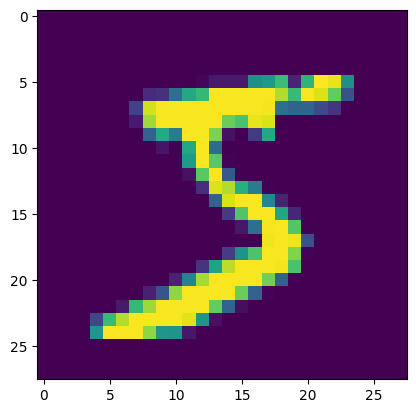

In [9]:
plt.imshow(x_train[0])
plt.show()

In [10]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [11]:
from keras.utils import to_categorical

In [12]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [13]:
y_train_encoded.shape

(60000, 10)

In [14]:
x_train_reshaped = np.reshape(x_train,(60000, 784))
x_test_reshaped = np.reshape(x_test,(10000, 784))

In [15]:
# data normalization
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
ep = math.e ** -10

In [16]:
x_train_norm = (x_train_reshaped - x_mean) / (x_std + ep)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + ep)

In [17]:
# modeling neural networks
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x_train_norm, y_train_encoded, epochs=5)

2024-01-06 20:03:33.335508: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3660 - accuracy: 0.8940
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1799 - accuracy: 0.9477
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9606
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1103 - accuracy: 0.9686
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0935 - accuracy: 0.9734


In [21]:
loss , accuracy = model.evaluate(x_test_norm, y_test_encoded)

2024-01-06 20:04:01.665378: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9683


In [22]:
print("loss = ", loss * 100)

loss =  10.44209823012352


In [23]:
print("accuracy ", accuracy * 100)

accuracy  96.82999849319458


In [24]:
def classifiy_number(sample):
    sample = sample.reshape(1, 784)
    result = model.predict(sample)
    return np.argmax(result)

In [25]:
i = 8
real = y_train[i]
predicted = classifiy_number(x_train_norm[i])

print("Real value = ", real)
print("Predicted value = ", predicted)

1/1 [==============================] - 0s 110ms/step
Real value =  1
Predicted value =  1


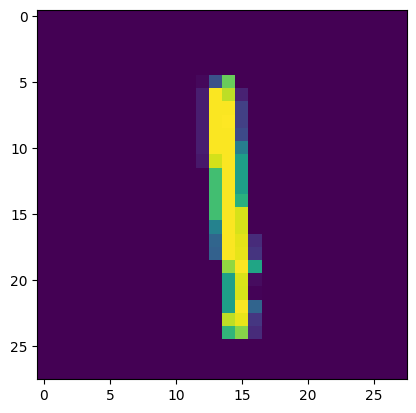

In [26]:
plt.imshow(x_train[i])
plt.show()

In [27]:
import pickle
pickle.dump(model, open("number_classifier.pkl", "wb"))

In [28]:
# x_train
pickle.dump(x_train, open("x_train.pkl",'wb'))
# x_train_norm
pickle.dump(x_train_norm, open("x_train_norm.pkl",'wb'))
# y_train
pickle.dump(y_train, open("y_train.pkl",'wb'))